In [21]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook, we'll implement multivariate linear regression with a simple example.

First, as before, let's make up some fake data:

Text(0, 0.5, 'y')

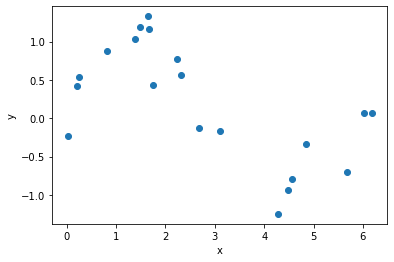

In [30]:
n = 20  # number of data points

# Simulated data:
x_data = 2*np.pi*np.random.rand(n)
noise_amp = 0.3
noise = noise_amp*np.random.randn(n)
y_data = np.sin(x_data) + noise

plt.plot(x_data, y_data, 'o')
plt.xlabel('x')
plt.ylabel('y')

We'll fit this data with a polynomial, as before, except that this time we'll do it from scratch rather than using a built-in Numpy function.

**Exercise**: Using the data above, create a polynomial feature vector for each data point and combine these feature vectors into a design matrix $\Phi_{nj} = \phi_j(x_n) = x_n^j$, where $x_n$ is one of the data points, and $j=0, \ldots, M-1$.

In [31]:
## Solution ##

m = 10  # number of feature vectors (i.e. m-1 is the order of the polynomial)

# Create the design matrix:
phi = np.zeros((n, m))
for j in range(m):
    phi[:,j] = x_data**j

Our goal is to fit the above data as a function $y(x_n, \vec{w}) = \vec{w} \cdot \vec{\phi}(x_n)$, choosing parameter vector $\mathbf{w}$ to optimize the following loss function:
$$
E(\vec{w}) = \frac{1}{2} \sum_{n=1}^N [t_n - y(x_n, \vec{w})]^2 
+ \frac{\alpha}{2} |\vec{w}|^2,
$$
where $t_n$ is the y coordinate of data point $n$.
As we showed in class, the solution is given by
$$
\vec{w} = [\alpha I + \Phi^\top \Phi ]^{-1} \Phi^\top \vec{t}
$$

**Exercise**: Using the above solution for $\vec{w}$, plot the prediction curve $y(x, \vec{w})$ along with the data. Try doing this with a few different values of $\alpha$ and see how the curves differ.

Text(0, 0.5, 'y')

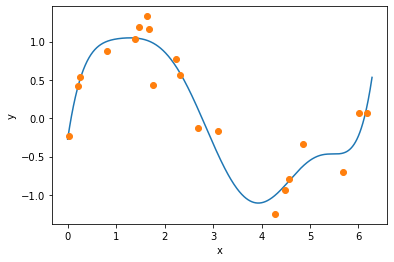

In [32]:
## Solution ##

alpha = 0.0  # regularization parameter

# The weight vector minimizing the mean squared error:
w = np.linalg.inv(alpha*np.eye(m) + phi.T @ phi) @ phi.T @ y_data

# To plot the prediction curve, create an array of x data and corresponding y data:
x_array = np.arange(0, 2*np.pi, 0.01)
y_pred = np.zeros_like(x_array)
for i, x in enumerate(x_array):
    y_pred[i] = np.sum([w[j]*x**j for j in range(m)])
    
plt.plot(x_array, y_pred)
plt.plot(x_data, y_data, 'o')
plt.xlabel('x')
plt.ylabel('y')

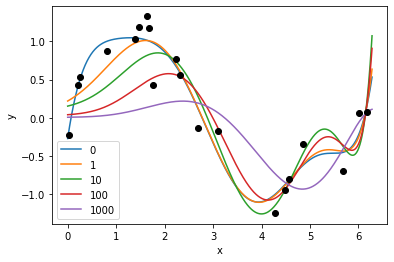

In [33]:
# Same as above, but now with several values of alpha.

alpha_list = [0,1,10,100,1000]  # regularization parameter

for alpha in alpha_list:
    # The weight vector minimizing the mean squared error:
    w = np.linalg.inv(alpha*np.eye(m) + phi.T @ phi) @ phi.T @ y_data

    # To plot the prediction curve, create an array of x data and corresponding y data:
    x_array = np.arange(0, 2*np.pi, 0.01)
    y_pred = np.zeros_like(x_array)
    for i, x in enumerate(x_array):
        y_pred[i] = np.sum([w[j]*x**j for j in range(m)])

    plt.plot(x_array, y_pred)
    
plt.plot(x_data, y_data, 'ok')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(alpha_list)